# Plot Map of the TPL-008-1 NERC Regions


In [1]:
# Start by importing the packages we need:
import os
import warnings

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable


## Suppress Future Warnings


In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)


## Set the Directory Structure


In [3]:
# Identify the data and impage input and output directories:
nerc_regions_input_directory = '/Users/burl878/Documents/Code/code_repos/burleyson-etal_2026_tbd/data/NERC_TPL08_shapefiles/'
state_shapefile_input_directory = '/Users/burl878/Documents/Code/code_repos/burleyson-etal_2026_tbd/data/state_shapefiles/'
image_output_directory = '/Users/burl878/Documents/Code/code_repos/burleyson-etal_2026_tbd/figures/'


## Create the Function to Plot the TPL-008-1 NERC Regions


In [4]:
def plot_nerc_regions(nerc_regions_input_directory: str, state_shapefile_input_directory: str,
                      image_output_directory: str, image_resolution: int, save_images=False):
    
    # Read in the state shapefile and reproject the shapefile onto latitute and longitude coordinates::
    states_df = gpd.read_file(os.path.join(state_shapefile_input_directory, 'tl_2022_us_state.shp')).rename(columns={'NAME': 'State'})
    states_df = states_df.to_crs({'init': 'EPSG:4269'})

    # Read in the TPL-08 NERC regions shapefile and reproject the shapefile onto latitute and longitude coordinates:
    nerc_regions_df = gpd.read_file(os.path.join(nerc_regions_input_directory, 'NERC_TPL08.shp'))
    nerc_regions_df = nerc_regions_df.to_crs({'init': 'EPSG:4269'})

    # Assign colors for each region:
    nerc_regions_df.at[0,'color'] = 'green'
    nerc_regions_df.at[1,'color'] = 'peru'
    nerc_regions_df.at[2,'color'] = 'darkorange'
    nerc_regions_df.at[3,'color'] = 'red'
    nerc_regions_df.at[4,'color'] = 'limegreen'
    nerc_regions_df.at[5,'color'] = 'turquoise'
    nerc_regions_df.at[6,'color'] = 'dodgerblue'
    nerc_regions_df.at[7,'color'] = 'lightcoral'
    nerc_regions_df.at[8,'color'] = 'purple'
    nerc_regions_df.at[9,'color'] = 'lightsteelblue'
    nerc_regions_df.at[10,'color'] = 'bisque'
    nerc_regions_df.at[11,'color'] = 'gold'
    nerc_regions_df.at[12,'color'] = 'darkolivegreen'
    nerc_regions_df.at[13,'color'] = 'firebrick'
    nerc_regions_df.at[14,'color'] = 'magenta'
    nerc_regions_df.at[15,'color'] = 'slateblue'

    # Manually adjust some region names so they render in two lines instead of one:
    nerc_regions_df.at[4,'NERC'] = 'Great \n Basin'
    nerc_regions_df.at[9,'NERC'] = 'Pacific \n Northwest'
    nerc_regions_df.at[11,'NERC'] = 'Rocky \n Mountain'
    
    # Create the figure:
    fig, ax = plt.subplots(1, 1, figsize=(25, 10))
    plt.rcParams['font.size'] = 21
    ax1 = nerc_regions_df.plot(ax=ax, color=nerc_regions_df['color'], edgecolor='gray', linewidth=0)
    nerc_regions_df.apply(lambda x: ax.annotate(text=x['NERC'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=18, weight='bold'), axis=1);
    ax2 = states_df.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)
    ax.set_xlim(-126.4, -66);
    ax.set_xlabel('Longitude', fontsize=21); 
    ax.set_ylim(24, 50); 
    ax.set_ylabel('Latitude', fontsize=21);
    ax.set_title('NERC TPL-008-1 Weather Regions', fontsize=24)

    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       plt.savefig(os.path.join(image_output_directory + 'Regions.png'), dpi=image_resolution, bbox_inches='tight')

    return nerc_regions_df


## Make the Plot


,NERC,geometry,color
0,NYISO,"MULTIPOLYGON (((-73.83275 40.58947, -73.83673 ...",green
1,California,"MULTIPOLYGON (((-114.41768 32.9441, -114.41421...",peru
2,ERCOT,"MULTIPOLYGON (((-97.16184 26.09579, -97.16102 ...",darkorange
3,Florida,"MULTIPOLYGON (((-81.81409 24.56017, -81.81442 ...",red
4,Great \n Basin,"POLYGON ((-119.99756 40.27928, -119.9979 40.55...",limegreen
5,ISONE,"MULTIPOLYGON (((-73.42142 41.04695, -73.42208 ...",turquoise
6,Maritimes,"MULTIPOLYGON (((-66.90028 44.61333, -66.85861 ...",dodgerblue
7,MISO-N,"MULTIPOLYGON (((-91.18128 39.61483, -91.28894 ...",lightcoral
8,MISO-S,"MULTIPOLYGON (((-90.81274 29.05594, -90.81024 ...",purple
9,Pacific \n Northwest,"MULTIPOLYGON (((-114.80774 48.66163, -114.7529...",lightsteelblue


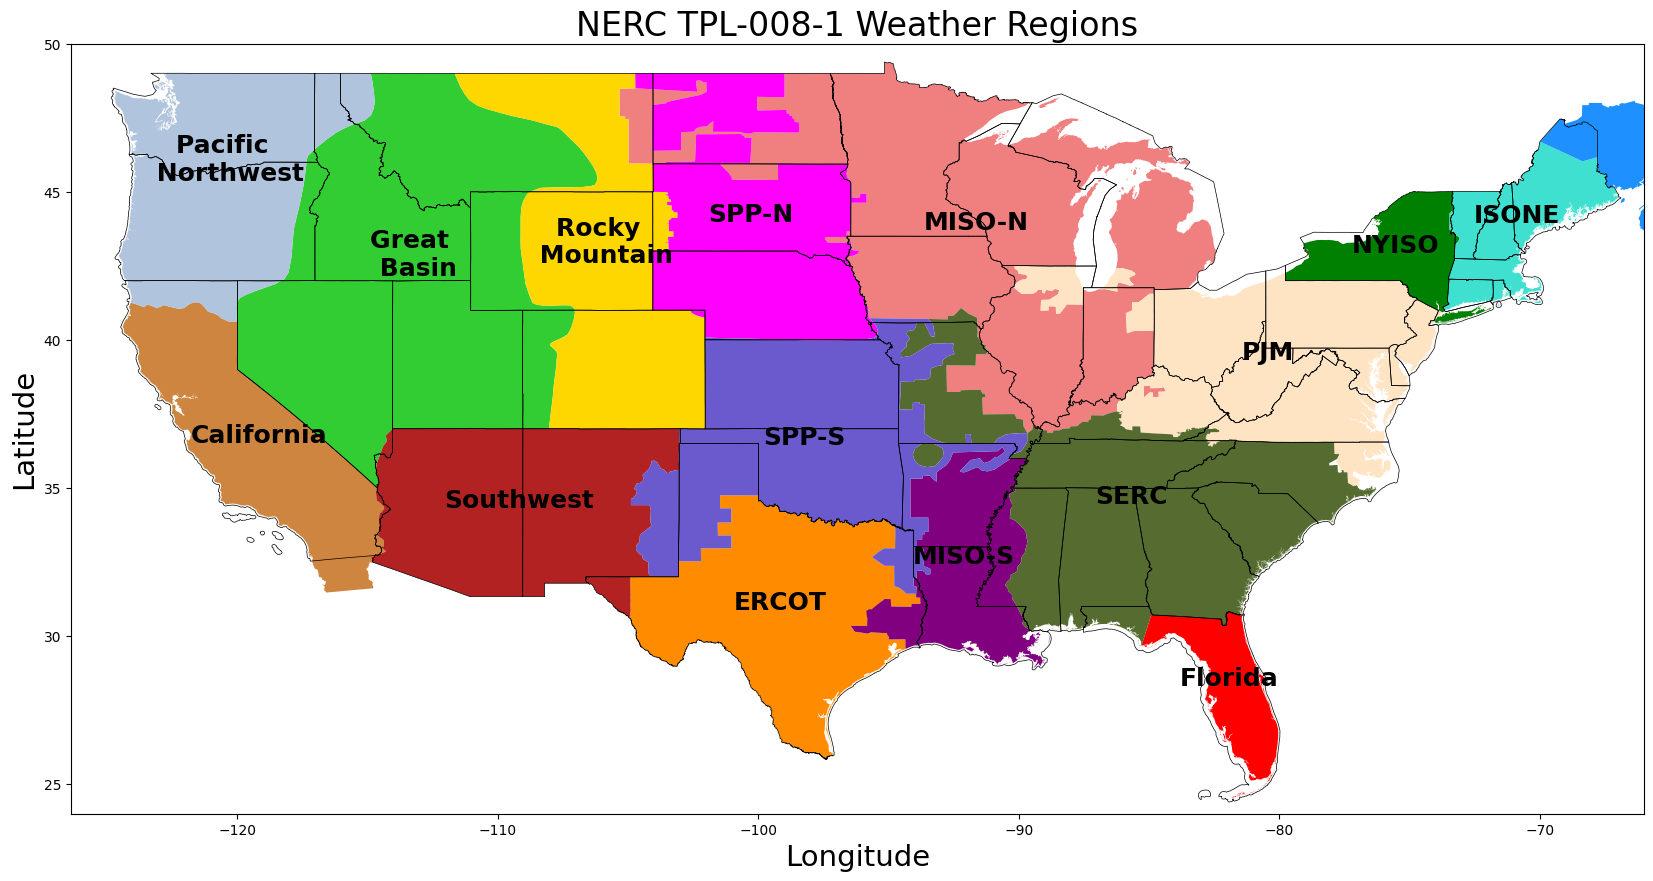

In [5]:
output_df = plot_nerc_regions(nerc_regions_input_directory = nerc_regions_input_directory,
                              state_shapefile_input_directory = state_shapefile_input_directory,
                              image_output_directory = image_output_directory, 
                              image_resolution = 600, 
                              save_images = True)

output_df
